# Create a Heatmap of Weather Data Using Seaborn. 
In this lesson we will use Seaborn to create a heatmap of one or more weather parameters such as temperature or humidity. The term 'heatmap' does not really have anything to do with heat, it's just a convenient way of referring to the plot method and the effect it creates. 

In [1]:
# Load packages
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from pprint import pprint

In [2]:
file = open("images/sdge_2d_weather_v1_jan-dec_2014_2015_2016.jpg", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=900,
    height=400,
)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe12"http://ns.adobe.com/xap/…

First, let's read the data in to Pandas dataframes. 

In [3]:
# Read CSV into Pandas DataFrames
input_dir = "data/csv/"
temperature_df = pd.read_csv(input_dir + "all_temperature.csv")
humidity_df = pd.read_csv(input_dir + "all_humidity.csv")
wind_speed_df = pd.read_csv(input_dir + "all_wind_speed.csv")
wind_dir_df = pd.read_csv(input_dir + "all_wind_dir.csv")

Let's take a peek at the default information available for the temperature dataframe. 

In [4]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Columns: 129 entries, AMO to WYN
dtypes: int64(129)
memory usage: 4.3 MB


Let's view the first 5 rows.

In [5]:
temperature_df.head()

,AMO,ANE,ARH,AVO,BLC,BMS,BNA,BOC,BRG,BRJ,...,WAL,WAR,WCK,WCV,WDC,WPT,WRB,WSY,WWY,WYN
0,47,49,49,48,46,42,49,39,58,52,...,50,44,44,44,39,46,53,41,40,38
1,47,49,49,48,46,42,49,39,58,51,...,49,44,44,43,39,46,53,41,40,38
2,48,49,48,47,47,42,50,39,57,51,...,49,44,44,43,39,45,53,41,40,38
3,47,49,48,47,47,42,49,40,57,51,...,49,43,45,44,40,45,53,41,40,38
4,47,49,48,46,46,42,49,40,57,51,...,49,43,44,44,40,45,53,41,40,38


Let's create a simple plot using matplotlib and pyplot to confirm the data looks good.

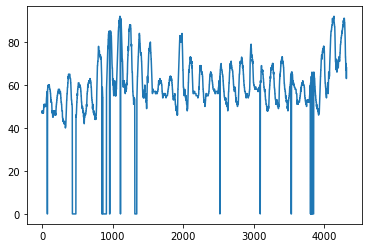

In [6]:
plt.plot(temperature_df['AMO'])

Just for fun, let's see how matplotlib deals with trying to plot the entire dataset at once. 

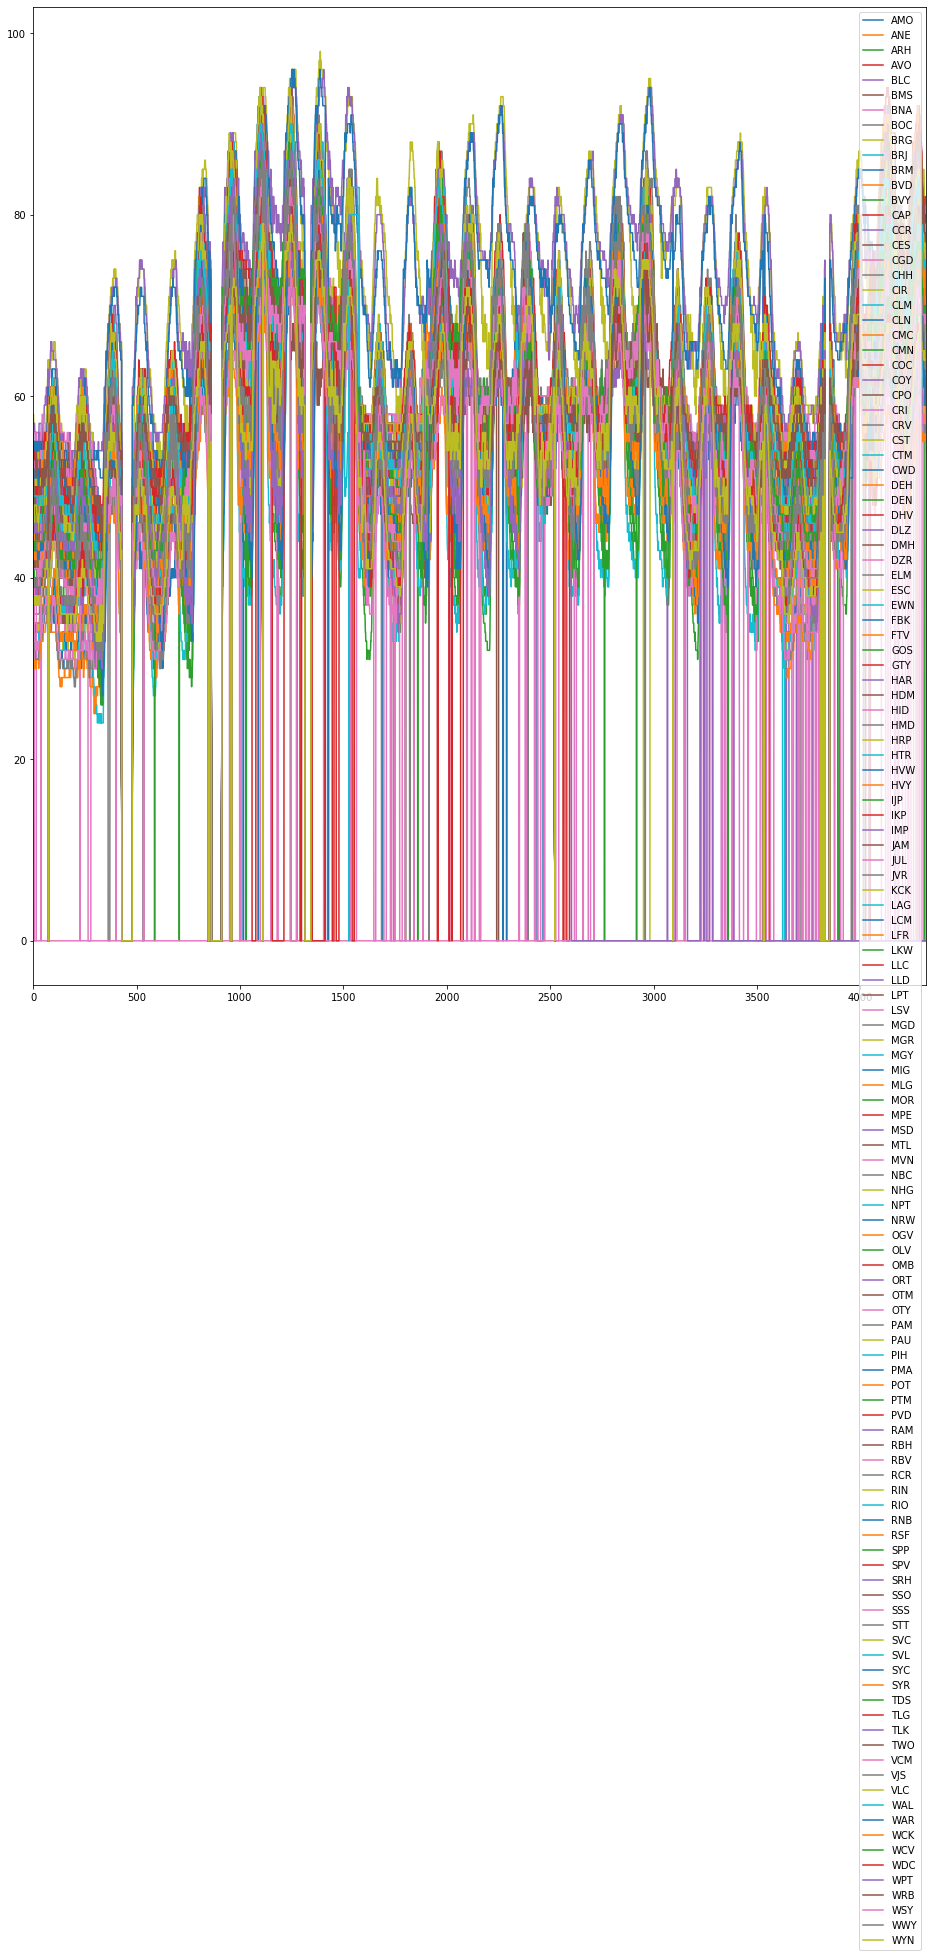

In [7]:
temperature_df.plot(figsize=(16,18))

Now let's create a 'heatmap' of temperature for the month of April, 2014.

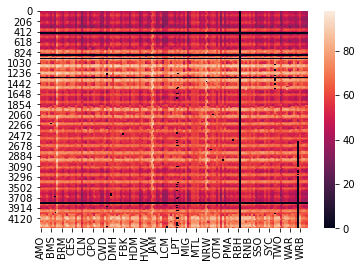

In [8]:
ax = sns.heatmap(temperature_df)

### Working With Seaborn Color Palettes

One of the most important factors to consider when generating a heatmap is the choice of color palettes. Seaborn supports several default color palettes, or you can create your own custom palette in several different ways. Here's an example of using one of Seaborn's default 'circular' palettes as a starting point. 

In [9]:
sns.hls_palette(8, l=.3, s=.8)

[(0.54, 0.08879999999999995, 0.05999999999999994),
 (0.54, 0.4488, 0.05999999999999994),
 (0.2712000000000001, 0.54, 0.05999999999999994),
 (0.05999999999999994, 0.54, 0.20880000000000004),
 (0.05999999999999994, 0.5111999999999999, 0.54),
 (0.05999999999999994, 0.15119999999999983, 0.54),
 (0.3287999999999998, 0.05999999999999994, 0.54),
 (0.54, 0.05999999999999994, 0.39119999999999966)]

We can render the color palette we have created to confirm it is what we want.

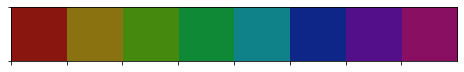

In [10]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

We can use the previous palette as a starting point and do some tweaking to enhance it. 

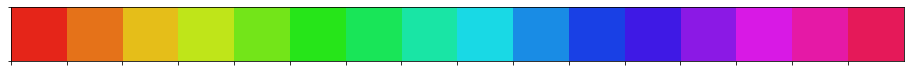

In [11]:
sns.palplot(sns.hls_palette(16, l=.5, s=.8))

Now let's try this palette and generate a much larger heatmap. 

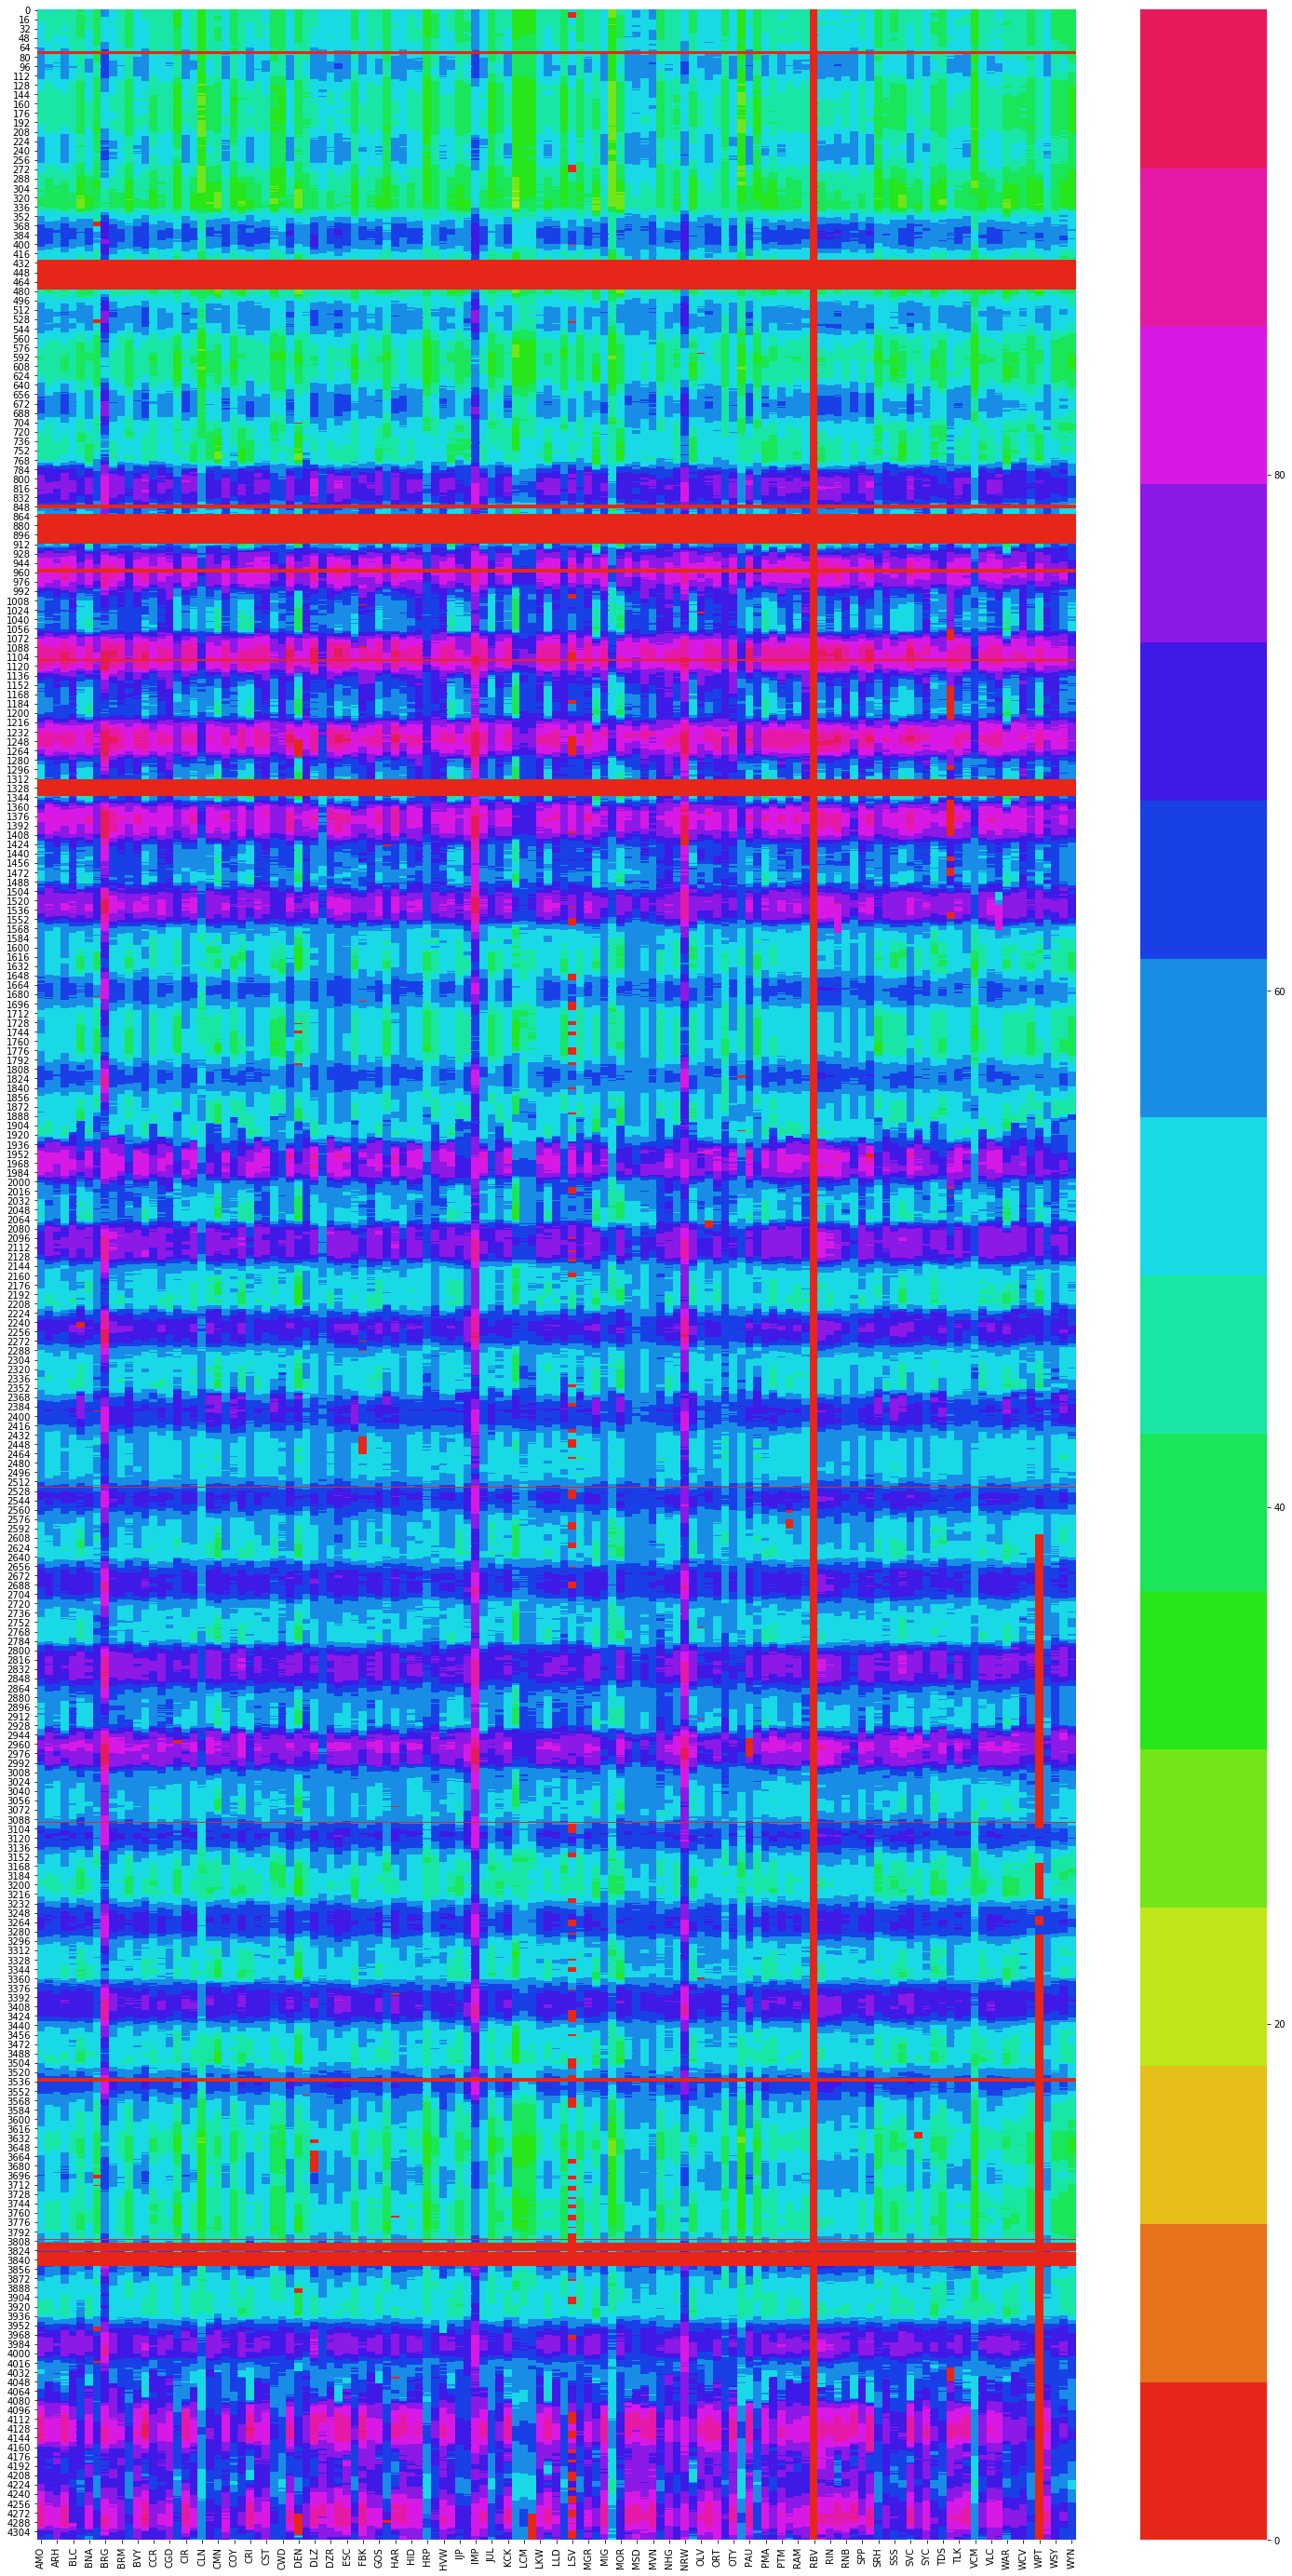

In [12]:
plt.figure(figsize = (25,50))
cmap = sns.hls_palette(16, l=.5, s=.8)
ax = sns.heatmap(temperature_df, cmap=cmap)

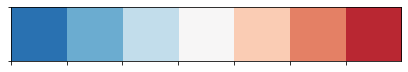

In [13]:
sns.palplot(sns.color_palette("RdBu_r", 7))

<Figure size 1800x3600 with 0 Axes>

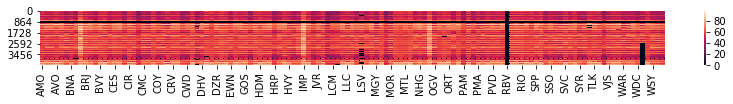

In [14]:
plt.figure(figsize = (25,50))
cmap = sns.palplot(sns.color_palette("RdBu_r", 14))
ax = sns.heatmap(temperature_df, cmap=cmap)

It's that simple. 